<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plotting" data-toc-modified-id="Plotting-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></div>

In [2]:
import warnings
import msmexplorer as msme
warnings.filterwarnings('ignore')
import seaborn as sns
%pylab inline
import numpy as np
import os 
import pandas as pd
import mdtraj as md 
sns.set_style("whitegrid")
sns.set_context("talk",1.3)
from msmbuilder.utils import load,dump

/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)
/home/sbhakat/miniconda2/envs/py36/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.

Populating the interactive namespace from numpy and matplotlib


In [3]:
tica_mdl_dihed =load("/home/sbhakat/Abisko/Plasmepsin_runs/Norm_close/TIP4P/MD/TICA_generation/Flap-chi1-chi2/tica_mdl_flapchi1angle.pkl")

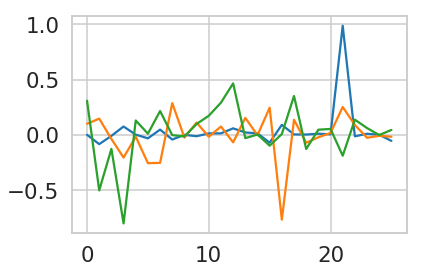

In [8]:
plot(tica_mdl_dihed.components_[0])
plot(tica_mdl_dihed.components_[1])
plot(tica_mdl_dihed.components_[2])

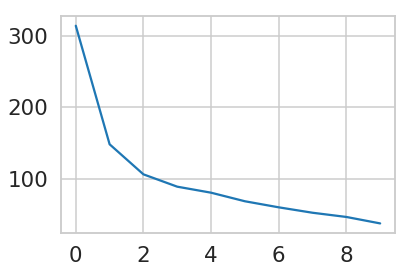

In [5]:
plot(tica_mdl_dihed.timescales_)

In [2]:
from msmbuilder.dataset import dataset
from msmbuilder.featurizer import ContactFeaturizer
from msmbuilder.featurizer import DihedralFeaturizer
from msmbuilder.decomposition import tICA
from msmbuilder.cluster import MiniBatchKMeans
from msmbuilder.msm import ContinuousTimeMSM
from msmbuilder.utils import verbosedump,verboseload
from msmbuilder.cluster import KCenters
from msmbuilder.utils import load,dump

In [4]:
#other imports
import os,glob,shutil
import numpy as np
import mdtraj as md
import pandas as pd 
import pickle
#prettier plots

#Loading the trajectory
a = np.arange(1027,1357)
ds = dataset("/home/sbhakat/Plm-TICA-TIP4P-MD/trajfit.xtc", topology="/home/sbhakat/Plm-TICA-TIP4P-MD/prot.pdb", atom_indices=a)

In [5]:
#Featurization
featurizer = DihedralFeaturizer(types=['chi1', 'chi2'])
#dump(featurizer,"raw_featurizer.pkl")

#from msmbuilder.utils import load,dump
f=DihedralFeaturizer(types=['chi1', 'chi2'], sincos=False)
dump(f,"raw_featurizer.pkl")

In [6]:
diheds = featurizer.fit_transform(ds)
dump(diheds, "features.pkl")
print(diheds[0].shape)

(669019, 58)


In [8]:
top = md.load("/home/sbhakat/Plm-TICA-TIP4P-MD/prot.pdb", atom_indices=a)
feat = DihedralFeaturizer(types=['chi1', 'chi2'])
df1 = pd.DataFrame(feat.describe_features(top))

In [9]:
df1

,atominds,featuregroup,featurizer,otherinfo,resids,resnames,resseqs
0,"[14, 16, 18, 21]",chi1,Dihedral,sin,[69],[LYS],[70]
1,"[36, 38, 40, 43]",chi1,Dihedral,sin,[70],[ASP],[71]
2,"[55, 57, 59, 65]",chi1,Dihedral,sin,[72],[THR],[73]
3,"[69, 71, 73, 76]",chi1,Dihedral,sin,[73],[LYS],[74]
4,"[91, 93, 95, 97]",chi1,Dihedral,sin,[74],[VAL],[75]
5,"[107, 109, 111, 114]",chi1,Dihedral,sin,[75],[GLU],[76]
6,"[122, 124, 126, 129]",chi1,Dihedral,sin,[76],[MET],[77]
7,"[139, 141, 143, 146]",chi1,Dihedral,sin,[77],[ASN],[78]
8,"[153, 155, 157, 160]",chi1,Dihedral,sin,[78],[TYR],[79]
9,"[174, 176, 178, 180]",chi1,Dihedral,sin,[79],[VAL],[80]


In [10]:
#Robust scaling
from msmbuilder.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_diheds = scaler.fit_transform(diheds)

print(diheds[0].shape)
print(scaled_diheds[0].shape)

(669019, 58)
(669019, 58)


In [23]:
tica_model = tICA(lag_time=10, n_components=10)
# fit and transform can be done in seperate steps:
tica_model.fit(scaled_diheds)
tica_trajs = tica_model.transform(scaled_diheds)

In [12]:
print(diheds[0].shape)
print(tica_trajs[0].shape)

#lets dump the tica mdl for future use
verbosedump(tica_model,"tica_mdl_flapchi1angle.pkl")

(669019, 58)
(669019, 10)
Saving "tica_mdl_flapchi1angle.pkl"... (<class 'msmbuilder.decomposition.tica.tICA'>)


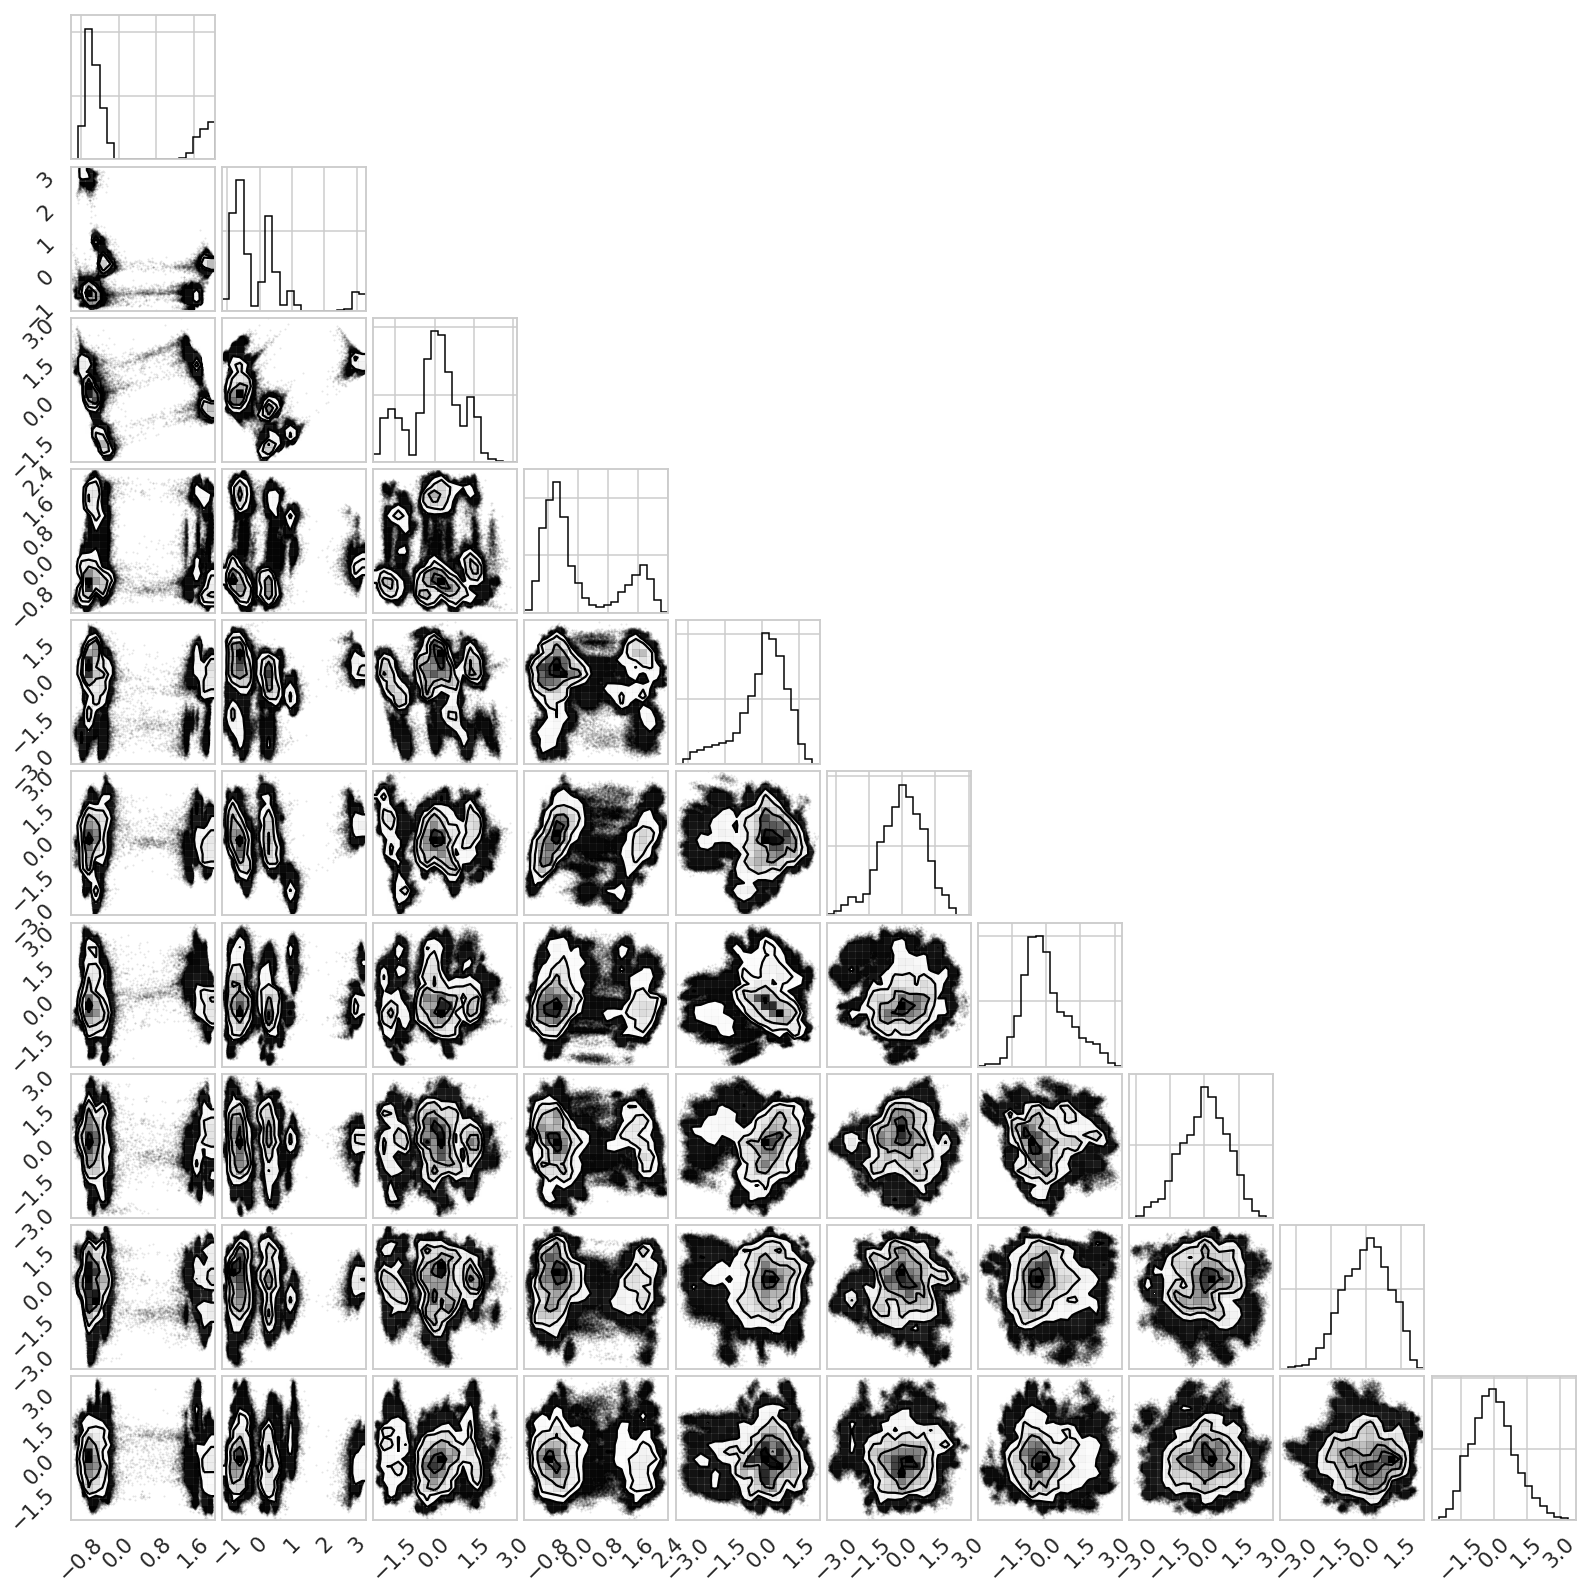

In [13]:
%matplotlib inline
import msmexplorer as msme
import numpy as np
txx = np.concatenate(tica_trajs)
_ = msme.plot_histogram(txx)

In [3]:
tica_mdl_dihed =load("tica_mdl_flapchi1angle.pkl")

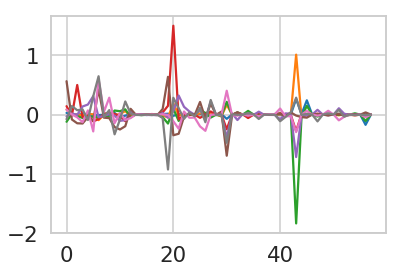

In [12]:
plot(tica_mdl_dihed.components_[0])
plot(tica_mdl_dihed.components_[1])
plot(tica_mdl_dihed.components_[2])
plot(tica_mdl_dihed.components_[3])
plot(tica_mdl_dihed.components_[4])
plot(tica_mdl_dihed.components_[5])
plot(tica_mdl_dihed.components_[6])
plot(tica_mdl_dihed.components_[7])

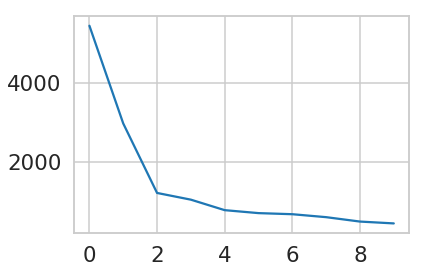

In [16]:
plot(tica_mdl_dihed.timescales_)

## Plotting

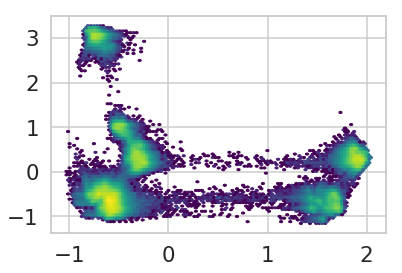

In [21]:
from matplotlib import pyplot as plt
plt.hexbin(txx[:,0], txx[:,1], bins='log', mincnt=1, cmap='viridis')

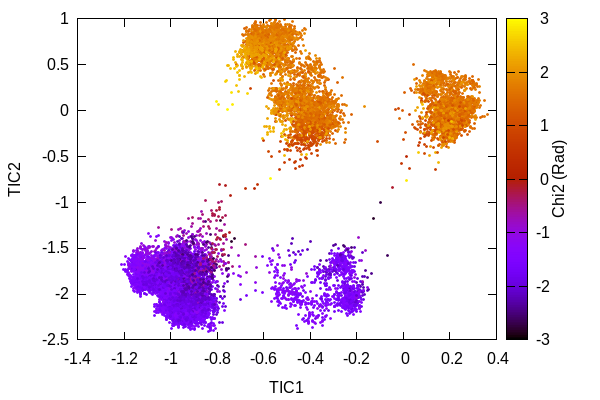

reset
set xlabel 'TIC1'
set ylabel 'TIC2'
set cblabel 'Chi2 (Rad)'

set palette model RGB

set output '/tmp/gnuplot-inline-1604583219.390423.949405702222.png'
p '~/Plm-TICA-TIP4P-MD/COLVAR' every 50 u 2:3:7 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [4]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'TIC1'
set ylabel 'TIC2'
set cblabel 'Chi2 (Rad)'

set palette model RGB

p '~/Plm-TICA-TIP4P-MD/COLVAR' every 50 u 2:3:7 notitle with points pt 7 palette ps 0.3

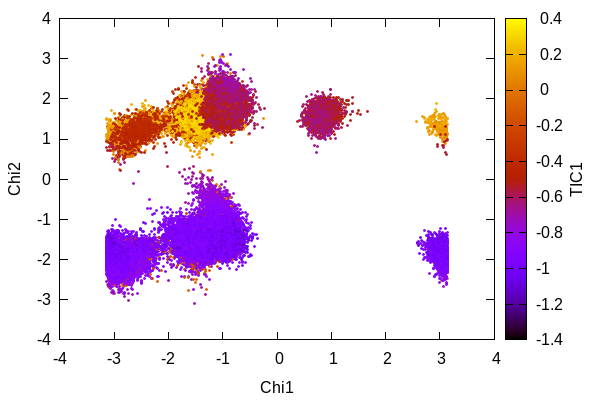

reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'TIC1'

set palette model RGB

set output '/tmp/gnuplot-inline-1604582587.976958.443846828104.png'
p '~/Plm-TICA-TIP4P-MD/COLVAR' every 10 u 6:7:2 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [2]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'TIC1'

set palette model RGB

p '~/Plm-TICA-TIP4P-MD/COLVAR' every 10 u 6:7:2 notitle with points pt 7 palette ps 0.3

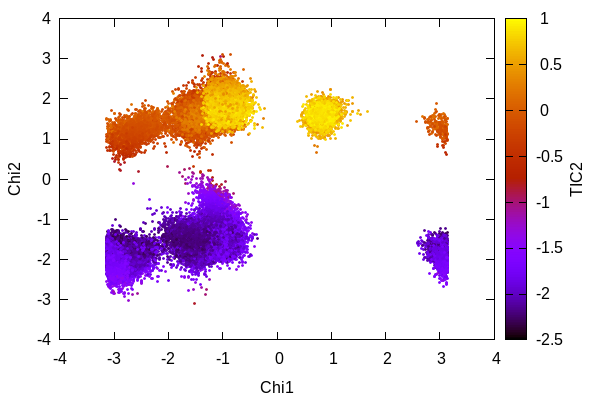

reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'TIC2'

set palette model RGB

set output '/tmp/gnuplot-inline-1604582620.643541.148229814289.png'
p '~/Plm-TICA-TIP4P-MD/COLVAR' every 10 u 6:7:3 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [3]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'TIC2'

set palette model RGB

p '~/Plm-TICA-TIP4P-MD/COLVAR' every 10 u 6:7:3 notitle with points pt 7 palette ps 0.3

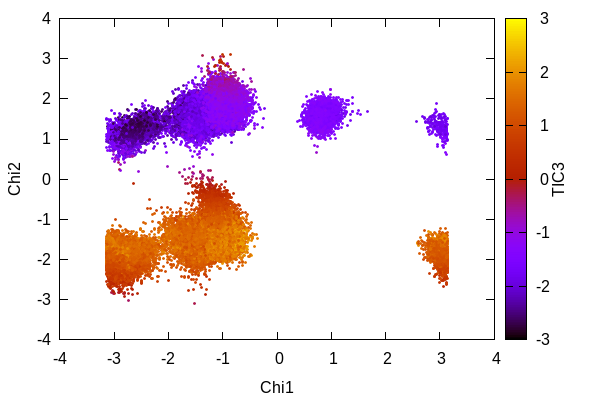

reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'TIC3'

set palette model RGB

set output '/tmp/gnuplot-inline-1604582663.692866.386669251267.png'
p '~/Plm-TICA-TIP4P-MD/COLVAR' every 10 u 6:7:4 notitle with points pt 7 palette ps 0.3








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [4]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Chi1'
set ylabel 'Chi2'
set cblabel 'TIC3'

set palette model RGB

p '~/Plm-TICA-TIP4P-MD/COLVAR' every 10 u 6:7:4 notitle with points pt 7 palette ps 0.3

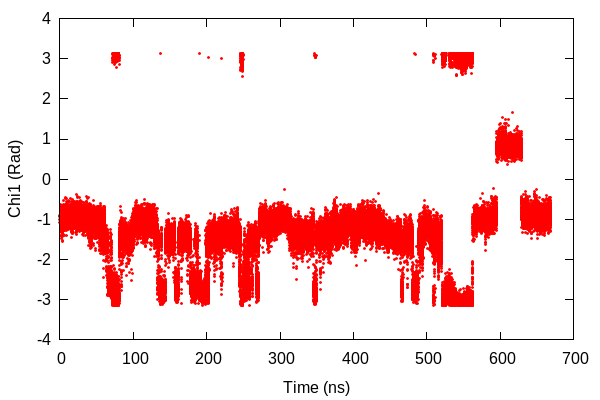

reset
set xlabel 'Time (ns)'
set ylabel 'Chi1 (Rad)'

set output '/tmp/gnuplot-inline-1604584500.9596941.84579763932.png'
p '~/Plm-TICA-TIP4P-MD/COLVAR' every 10 u ($1/1000):6 w p pt 7 ps 0.3 lc 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [11]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Chi1 (Rad)'

p '~/Plm-TICA-TIP4P-MD/COLVAR' every 10 u ($1/1000):6 w p pt 7 ps 0.3 lc 1 notitle

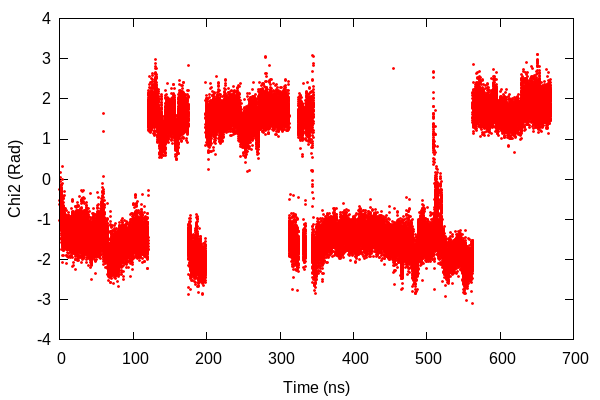

reset
set xlabel 'Time (ns)'
set ylabel 'Chi2 (Rad)'

set output '/tmp/gnuplot-inline-1604584530.424475.863003538330.png'
p '~/Plm-TICA-TIP4P-MD/COLVAR' every 10 u ($1/1000):7 w p pt 7 ps 0.3 lc 1 notitle








gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> gnuplot> unset output


In [12]:
%gnuplot inline pngcairo font "Arial,12" size 600,400
reset
set xlabel 'Time (ns)'
set ylabel 'Chi2 (Rad)'

p '~/Plm-TICA-TIP4P-MD/COLVAR' every 10 u ($1/1000):7 w p pt 7 ps 0.3 lc 1 notitle

In [29]:
from msmbuilder.decomposition import tICA, PCA

In [30]:
pca = PCA(n_components=1)
pca.fit(scaled_diheds)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

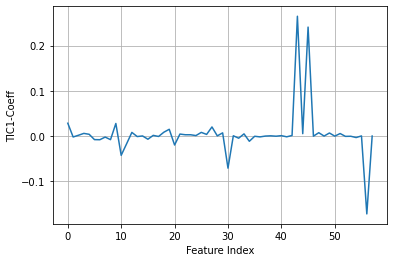

In [5]:
import matplotlib.pyplot as plt

plt.plot([0.0284781403433,-0.00194645219786,0.00185736258695,0.00598119954711,0.00401057064238,-0.00778862072145,-0.00801360829866,-0.0021675690908,-0.00786048233495,0.027913934389,-0.0425340784679,-0.017344912687,0.00816006234605,-0.000991454210825,0.000332245252201,-0.00691505598445,0.00161159526541,-0.000797614951254,0.00866896249183,0.0150658086365,-0.019703643942,0.00449778915185,0.00298879059104,0.00295527424435,0.00118383453312,0.0082177121046,0.00373032936468,0.0202516405687,0.000504457239825,0.00717686577262,-0.0708958498852,0.000737886485318,-0.00463440968742,0.00492229398275,-0.0114520874009,-0.000368447504229,-0.00175138082661,8.24212201985e-05,0.000636375057504,-0.00023105447261,0.00100462774452,-0.00155866247963,0.00138726362135,0.265047364661,0.00537626057056,0.24104780726,-0.000134536482644,0.00749984645821,7.65026659423e-05,0.00689347256964,-9.99353533987e-05,0.00568246800835,-0.000590490228894,-0.000359170142656,-0.00317501372884,0.000390420024749,-0.172072132601,0.000129826493122])

plt.ylabel('TIC1-Coeff')
plt.xlabel('Feature Index')
plt.grid(True)
plt.show()

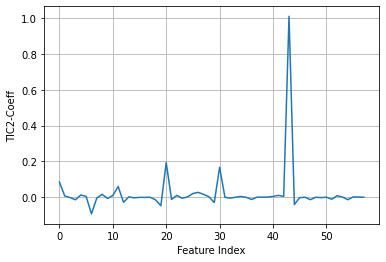

In [4]:
import matplotlib.pyplot as plt

plt.plot([0.0845989172842,0.00679970467936,-0.00207981371727,-0.0144345334558,0.0122811221994,0.00471961894747,-0.0933907091811,-0.00475239287664,0.0160087252089,-0.00717604899506,0.00944833178541,0.0598296337991,-0.0283327673073,0.00175105837539,-0.00358879357753,-0.000892350102171,-0.000876776236657,-0.000424474367115,-0.0146331165668,-0.0478209225906,0.19359030251,-0.0125205109221,0.0101924144224,-0.00598493841074,0.00168500664035,0.0206867075046,0.0268675824588,0.015906988886,0.00271973545079,-0.0298668695733,0.167195542505,-0.000743493487439,-0.0054538181545,-7.95832885365e-05,0.00390765141897,-0.000788544464583,-0.012732418193,0.000131548281039,0.000261367649554,0.000694877611469,0.00421446481007,0.0101029201904,0.00440980614891,1.01075869335,-0.0410709837373,-0.00243980060719,-0.000209125027512,-0.0139317703747,-0.000111901536411,-0.00243555733041,9.60057893922e-05,-0.0115995352746,0.00822712292649,0.000970375034976,-0.0140622023824,0.00122381724811,0.00103829087357,-8.04153842874e-05])

plt.ylabel('TIC2-Coeff')
plt.xlabel('Feature Index')
plt.grid(True)
plt.show()